In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [6]:
df = pd.read_csv('server/data-12-22-18.csv')
df['correct'] = (df.true == df.pred)
df['(true=1,pred=1)'] = (df.true == 1) &  (df.pred == 1)
df['(true=1,pred=0)'] = (df.true == 1) &  (df.pred == 0)
df['(true=0,pred=1)'] = (df.true == 0) &  (df.pred == 1)
df['(true=0,pred=0)'] = (df.true == 0) &  (df.pred == 0)
df = df[df.gender.isin(['male', 'female'])]

df.head()

,id,uid,expt_id,duration,true,pred,age,gender,expert,filename,correct,"(true=1,pred=1)","(true=1,pred=0)","(true=0,pred=1)","(true=0,pred=0)"
0,1,df28d326ca098ebc03e58dbfbf256259,2,1000,1,0,18,male,0,real-blur/real-blur-41.jpg,False,False,True,False,False
1,2,df28d326ca098ebc03e58dbfbf256259,2,1000,0,0,18,male,0,gan-blur/gan-blur-9.jpg,True,False,False,False,True
2,3,df28d326ca098ebc03e58dbfbf256259,2,1000,1,1,18,male,0,real-blur/real-blur-6.jpg,True,True,False,False,False
3,4,df28d326ca098ebc03e58dbfbf256259,2,1000,0,0,18,male,0,gan-blur/gan-blur-31.jpg,True,False,False,False,True
4,5,df28d326ca098ebc03e58dbfbf256259,2,1000,1,1,18,male,0,real-blur/real-blur-27.jpg,True,True,False,False,False


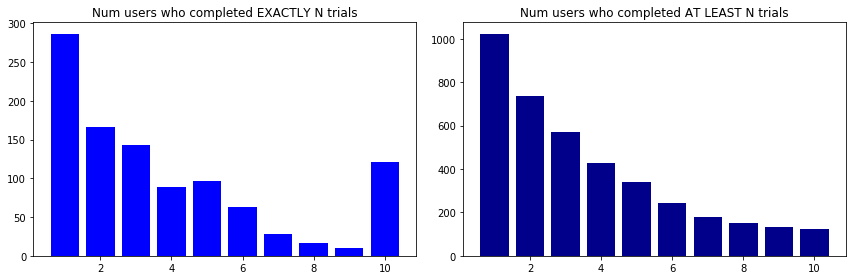

In [7]:
effort = np.array(df.groupby('uid').id.nunique().tolist())
remaining = [np.sum(np.array(effort) >= 6*n) for n in range(1,11)]
effort = [np.sum(effort//6 == i) for i in range(1,11)]

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(1,11), effort, color="blue")
ax2.bar(range(1,11), remaining, color="darkblue")

ax1.set_title("Num users who completed EXACTLY N trials")
ax2.set_title("Num users who completed AT LEAST N trials")

fig.tight_layout()
plt.show()

In [8]:
print ("Exp 1 datapoints: %d" % df[df.expt_id==1].id.count())
print ("Exp 2 datapoints: %d" % df[df.expt_id==2].id.count())
print ("started users: %d, completed users: %d" % (df.uid.nunique(), np.sum(df.groupby('uid').id.nunique() >= 60)))
print ("experts: %d, non-experts: %d" % (df[df.expert==1].uid.nunique(), df[df.expert==0].uid.nunique()))
print ("men: %d, women: %d" % (df[df.gender=='male'].uid.nunique(), df[df.gender=='female'].uid.nunique()))
print ("---------------------------------------------")
print(df[df.gender != 'other'].groupby(["expt_id", "duration"]).id.count().reset_index().sort_values(by=['expt_id','duration'], ascending=[True,False]))
print(df[df.gender != 'other'].groupby(["expt_id", "duration", "gender"]).id.count().reset_index().sort_values(by=['expt_id','duration'], ascending=[True,False]))

Exp 1 datapoints: 11352
Exp 2 datapoints: 12378
started users: 1025, completed users: 125
experts: 364, non-experts: 661
men: 869, women: 156
---------------------------------------------
   expt_id  duration    id
4        1      5000  2280
3        1      2000  2244
2        1      1000  2250
1        1       500  2280
0        1       250  2298
9        2      5000  2586
8        2      2000  2436
7        2      1000  2430
6        2       500  2400
5        2       250  2526
    expt_id  duration  gender    id
8         1      5000  female   420
9         1      5000    male  1860
6         1      2000  female   450
7         1      2000    male  1794
4         1      1000  female   378
5         1      1000    male  1872
2         1       500  female   420
3         1       500    male  1860
0         1       250  female   444
1         1       250    male  1854
18        2      5000  female   384
19        2      5000    male  2202
16        2      2000  female   384
17        2

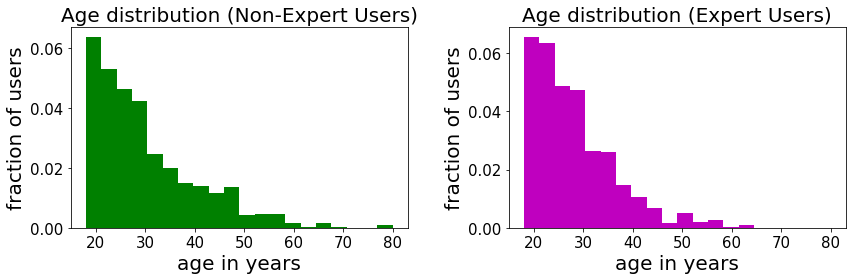

In [9]:
fs = 20
tfs = 15
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("Age distribution (Non-Expert Users)", fontsize=fs)
ax2.set_title("Age distribution (Expert Users)", fontsize=fs)
ax1.set_xlabel("age in years", fontsize=fs)
ax2.set_xlabel("age in years", fontsize=fs)
ax1.set_ylabel("fraction of users", fontsize=fs)
ax2.set_ylabel("fraction of users", fontsize=fs)
ax1.hist(df[df.expert==0].age, bins=20, range=(18,80), color="g", density=True)
ax2.hist(df[df.expert==1].age, bins=20, range=(18,80), color="m", density=True)

ax1.xaxis.set_tick_params(labelsize=tfs)
ax1.yaxis.set_tick_params(labelsize=tfs)
ax2.xaxis.set_tick_params(labelsize=tfs)
ax2.yaxis.set_tick_params(labelsize=tfs)
fig.tight_layout()
plt.show()

In [6]:
expt_id1 = 1
expt_id2 = 1
dur1 = 5000
dur2 = 5000
g1 = 'male'
g2 = 'female'
e1 = True
e2 = True

exp1_data = df[(df.expt_id==expt_id1) & (df.duration==dur1) & (df.gender==g1) & (df.expert==e1)].correct
exp2_data = df[(df.expt_id==expt_id2) & (df.duration==dur2) & (df.gender==g2) & (df.expert==e2)].correct

print (exp1_data.mean())
print (exp2_data.mean())


from scipy.stats import ttest_ind

print (ttest_ind(exp1_data, exp2_data))

0.7235142118863049
0.7549019607843137
Ttest_indResult(statistic=-0.6683881650418694, pvalue=0.5040623252889338)


In [7]:
def conf_interval(N, p_success):
    return (1.96/N)*np.sqrt(p_success*(1-p_success)*N) #95% conf interval


def get_results(df, columns):
    results = df.groupby(columns).agg({
        'uid': 'nunique',
        'id': 'nunique',
        'true': 'sum',
        'correct': 'sum',
        '(true=1,pred=1)': 'sum',
        '(true=0,pred=1)':'sum',
        '(true=1,pred=0)': 'sum',
        '(true=0,pred=0)': 'sum',
    }).reset_index()
    
    results['accuracy'] = results.correct / results.id   
    results['accuracy_conf'] = conf_interval(results.id, results.accuracy)
    
    results['(pred=1|true=1)'] = results['(true=1,pred=1)'] / results.true
    results['(pred=0|true=1)'] = results['(true=1,pred=0)'] / results.true
    results['(pred=1|true=0)'] = results['(true=0,pred=1)'] / (results.id - results.true)
    results['(pred=0|true=0)'] = results['(true=0,pred=0)'] / (results.id - results.true)

    results['(pred=1|true=1)_conf'] = conf_interval(results.true, results['(pred=1|true=1)'])
    results['(pred=0|true=1)_conf'] = conf_interval(results.true, results['(pred=0|true=1)'])
    results['(pred=1|true=0)_conf'] = conf_interval(results.id-results.true, results['(pred=1|true=0)'])
    results['(pred=0|true=0)_conf'] = conf_interval(results.id-results.true, results['(pred=0|true=0)'])

    return results

results = get_results(df, ['expt_id', 'duration'])
expert_results = get_results(df, ['expt_id', 'duration', 'expert'])
gender_results = get_results(df, ['expt_id', 'duration', 'gender'])
expert_gender_results = get_results(df, ['expt_id', 'duration', 'expert', 'gender'])

results

,expt_id,duration,uid,id,true,correct,"(true=1,pred=1)","(true=0,pred=1)","(true=1,pred=0)","(true=0,pred=0)",accuracy,accuracy_conf,(pred=1|true=1),(pred=0|true=1),(pred=1|true=0),(pred=0|true=0),(pred=1|true=1)_conf,(pred=0|true=1)_conf,(pred=1|true=0)_conf,(pred=0|true=0)_conf
0,1,250,377,2268,1097,1255.0,626.0,542.0,471.0,629.0,0.553351,0.020461,0.570647,0.429353,0.462852,0.537148,0.029292,0.029292,0.028559,0.028559
1,1,500,368,2220,1111,1308.0,624.0,425.0,487.0,684.0,0.589189,0.020466,0.561656,0.438344,0.383228,0.616772,0.029177,0.029177,0.028614,0.028614
2,1,1000,367,2208,1121,1428.0,671.0,330.0,450.0,757.0,0.646739,0.019937,0.598573,0.401427,0.303588,0.696412,0.028696,0.028696,0.027335,0.027335
3,1,2000,361,2184,1101,1461.0,683.0,305.0,418.0,778.0,0.668956,0.019737,0.620345,0.379655,0.281625,0.718375,0.028666,0.028666,0.026789,0.026789
4,1,5000,371,2238,1110,1559.0,721.0,290.0,389.0,838.0,0.696604,0.019047,0.649550,0.350450,0.257092,0.742908,0.028068,0.028068,0.025504,0.025504
5,2,250,410,2478,1235,1342.0,675.0,576.0,560.0,667.0,0.541566,0.019619,0.546559,0.453441,0.463395,0.536605,0.027765,0.027765,0.027722,0.027722
6,2,500,388,2334,1159,1310.0,619.0,484.0,540.0,691.0,0.561268,0.020132,0.534081,0.465919,0.411915,0.588085,0.028719,0.028719,0.028142,0.028142
7,2,1000,394,2376,1214,1472.0,690.0,380.0,524.0,782.0,0.619529,0.019522,0.568369,0.431631,0.327022,0.672978,0.027862,0.027862,0.026974,0.026974
8,2,2000,398,2394,1163,1589.0,706.0,348.0,457.0,883.0,0.663743,0.018925,0.607051,0.392949,0.282697,0.717303,0.028070,0.028070,0.025156,0.025156
9,2,5000,418,2520,1310,1719.0,813.0,304.0,497.0,906.0,0.682143,0.018181,0.620611,0.379389,0.251240,0.748760,0.026277,0.026277,0.024439,0.024439


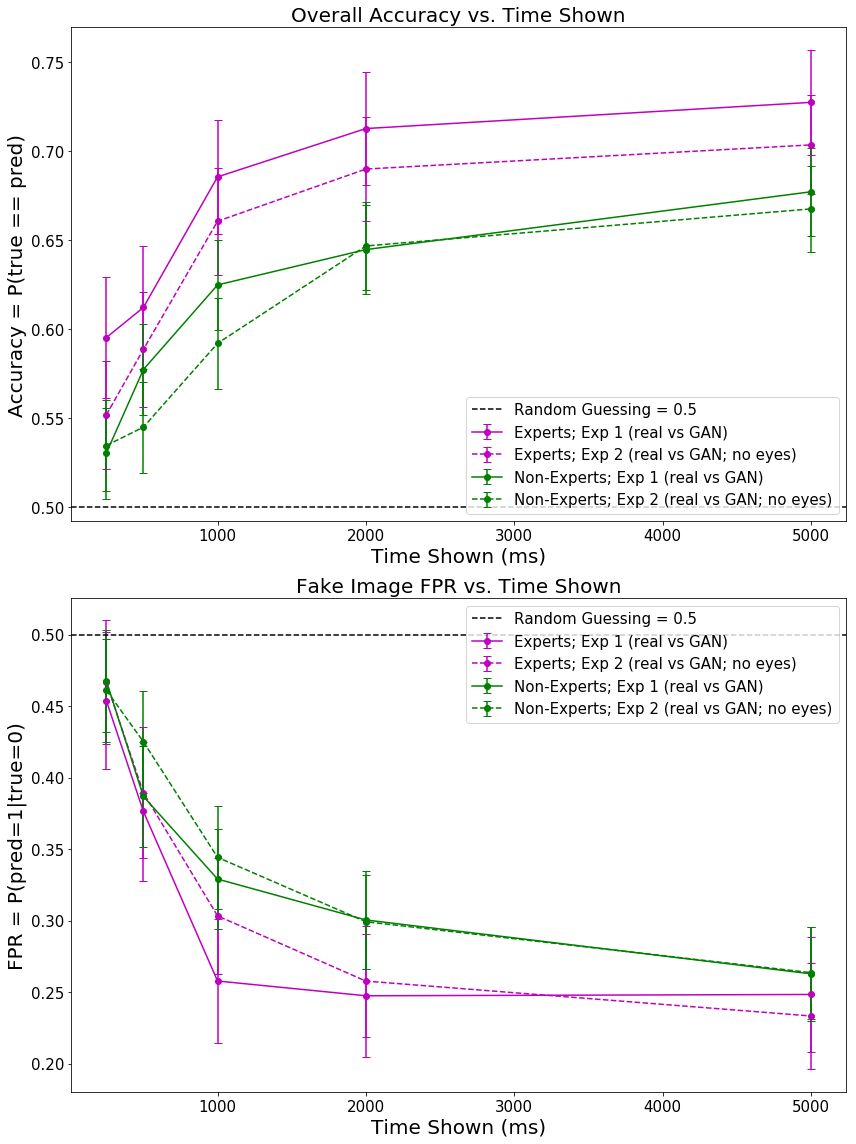

In [8]:
fig = plt.figure(figsize=(12,16))
fs = 20
tfs = 15

ax1 = fig.add_subplot(211)
ax1.set_title("Overall Accuracy vs. Time Shown", fontsize=fs)
ax1.set_xlabel("Time Shown (ms)", fontsize=fs)
ax1.set_ylabel("Accuracy = P(true == pred)", fontsize=fs)
ax2 = fig.add_subplot(212)
ax2.set_title("Fake Image FPR vs. Time Shown", fontsize=fs)
ax2.set_xlabel("Time Shown (ms)", fontsize=fs)
ax2.set_ylabel("FPR = P(pred=1|true=0)", fontsize=fs)

id_map = [
    (1, "Experts; Exp 1 (real vs GAN)", "m", "-", True), 
    (2, "Experts; Exp 2 (real vs GAN; no eyes)", "m", "--", True),
    (1, "Non-Experts; Exp 1 (real vs GAN)", "g", "-", False), 
    (2, "Non-Experts; Exp 2 (real vs GAN; no eyes)", "g", "--", False)
]

for (expt_id, label, color, linestyle, expert)  in id_map:
    exp_data = expert_results[(expert_results.expt_id == expt_id) & (expert_results.expert == expert)]
    ax1.errorbar(exp_data.duration, exp_data['accuracy'], yerr=exp_data['accuracy_conf'],
                 color=color, linestyle=linestyle, marker='o', label=label, capsize=4)
    ax2.errorbar(exp_data.duration, exp_data['(pred=1|true=0)'], yerr=exp_data['(pred=1|true=0)_conf'],
                 color=color, linestyle=linestyle, marker='o', label=label, capsize=4)

ax1.axhline(y=0.5, color="k", linestyle="--", label="Random Guessing = 0.5")
ax1.legend(loc=0, fontsize=tfs)
ax1.xaxis.set_tick_params(labelsize=tfs)
ax1.yaxis.set_tick_params(labelsize=tfs)

ax2.axhline(y=0.5, color="k", linestyle="--", label="Random Guessing = 0.5")
ax2.legend(loc=0, fontsize=tfs)
ax2.xaxis.set_tick_params(labelsize=tfs)
ax2.yaxis.set_tick_params(labelsize=tfs)

plt.tight_layout()
plt.show()

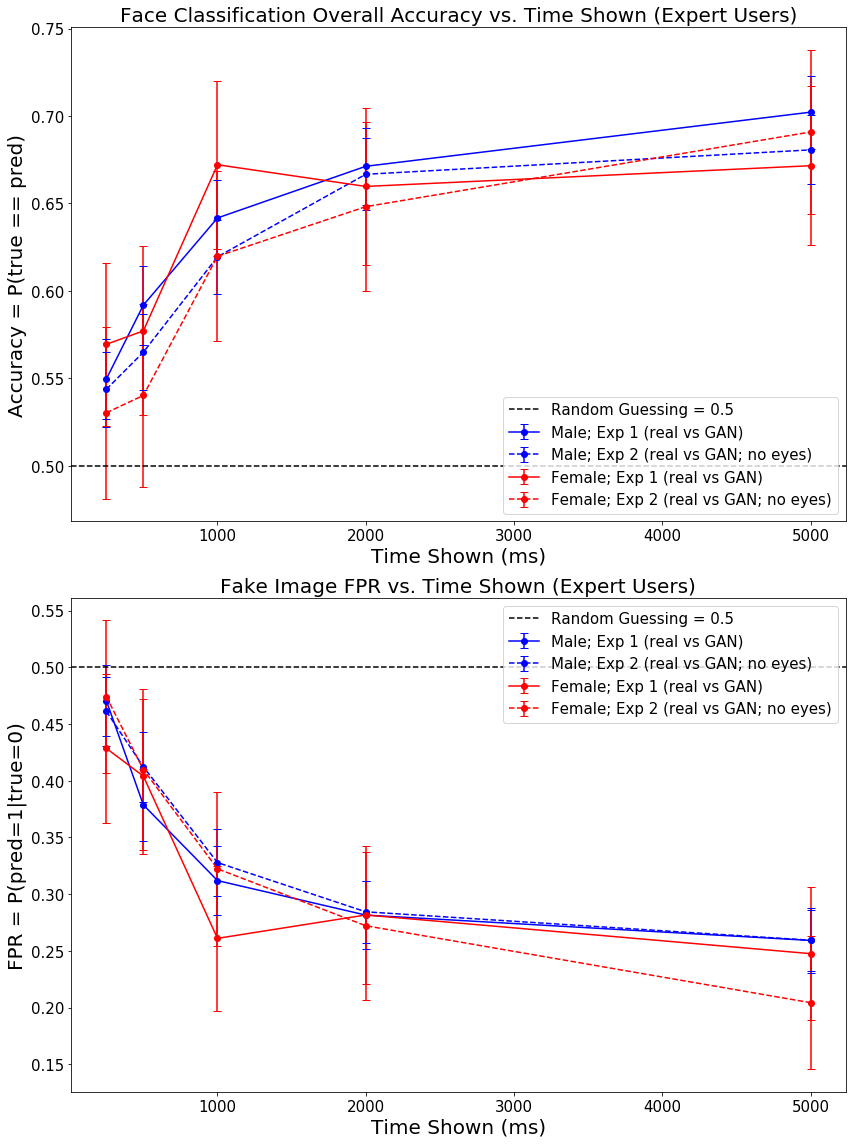

In [9]:
fs = 20
tfs = 15

fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(211)
ax1.set_title("Face Classification Overall Accuracy vs. Time Shown (Expert Users)", fontsize=fs)
ax1.set_xlabel("Time Shown (ms)", fontsize=fs)
ax1.set_ylabel("Accuracy = P(true == pred)", fontsize=fs)
ax2 = fig.add_subplot(212)
ax2.set_title("Fake Image FPR vs. Time Shown (Expert Users)", fontsize=fs)
ax2.set_xlabel("Time Shown (ms)", fontsize=fs)
ax2.set_ylabel("FPR = P(pred=1|true=0)", fontsize=fs)

gender_id_map = {
    ('male', 1):("Male; Exp 1 (real vs GAN)", "b", "-"), 
    ('male', 2):("Male; Exp 2 (real vs GAN; no eyes)", "b", "--"),
    ('female', 1):("Female; Exp 1 (real vs GAN)", "r", "-"), 
    ('female', 2):("Female; Exp 2 (real vs GAN; no eyes)", "r", "--")
}

expert_filter = None

for (gender, expt_id), (label, color, linestyle)  in gender_id_map.items():
    if expert_filter is not None:
        exp_data = expert_gender_results[(expert_gender_results.expert == expert_filter) &
                                         (expert_gender_results.gender == gender) & 
                                         (expert_gender_results.expt_id == expt_id)]
    else:
        exp_data = gender_results[(gender_results.gender == gender) & 
                                  (gender_results.expt_id == expt_id)]
        
    ax1.errorbar(exp_data.duration, exp_data['accuracy'], yerr=exp_data['accuracy_conf'],
                 color=color, linestyle=linestyle, marker='o', label=label, capsize=4)
    ax2.errorbar(exp_data.duration, exp_data['(pred=1|true=0)'], yerr=exp_data['(pred=1|true=0)_conf'],
                 color=color, linestyle=linestyle, marker='o', label=label, capsize=4)


ax1.axhline(y=0.5, color="k", linestyle="--", label="Random Guessing = 0.5")
ax1.legend(loc=0, fontsize=tfs)
ax1.xaxis.set_tick_params(labelsize=tfs)
ax1.yaxis.set_tick_params(labelsize=tfs)

ax2.axhline(y=0.5, color="k", linestyle="--", label="Random Guessing = 0.5")
ax2.legend(loc=0, fontsize=tfs)
ax2.xaxis.set_tick_params(labelsize=tfs)
ax2.yaxis.set_tick_params(labelsize=tfs)

plt.tight_layout()
plt.show()

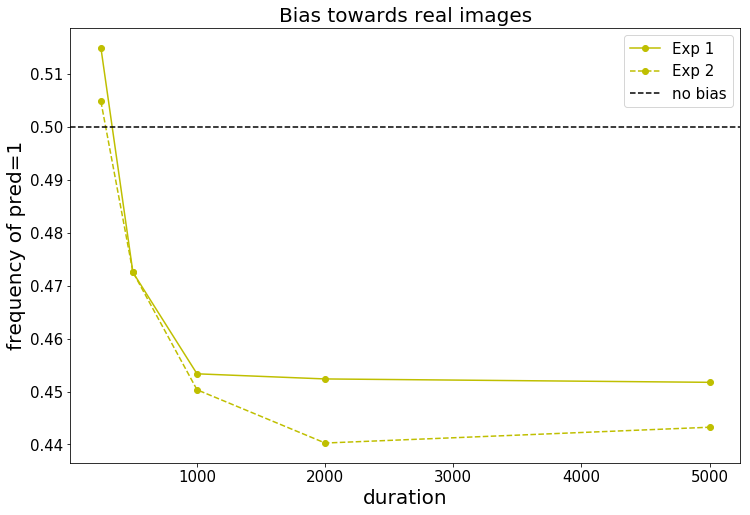

In [10]:
bias_df = df.groupby(['expt_id', 'duration']).pred.mean().reset_index()
fs = 20
tfs = 15

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
for expt_id, style in [(1, '-'),(2, '--')]:
    data = bias_df[bias_df.expt_id == expt_id].sort_values(by="duration", ascending=True)
    ax.plot(data.duration, data.pred, color='y', marker="o", linestyle=style, label="Exp %d" % expt_id)
    
ax.axhline(y=0.5, color="k", linestyle="--", label="no bias")
ax.set_title("Bias towards real images", fontsize=fs)
ax.set_xlabel("duration", fontsize=fs)
ax.set_ylabel("frequency of pred=1", fontsize=fs)
ax.legend(loc=0, fontsize=tfs)
ax.xaxis.set_tick_params(labelsize=tfs)
ax.yaxis.set_tick_params(labelsize=tfs)

plt.show()    


In [11]:
img_df = df.groupby('filename').agg({
    'id': 'count',
    'expt_id':'max',
    'correct': 'sum',
    'true': 'max'
}).reset_index()
img_df['accuracy'] = img_df.correct / img_df.id


gender_img_df = df.groupby(['filename', 'gender']).agg({
    'id': 'count',
    'expt_id':'max',
    'correct': 'sum',
    'true': 'max'
}).reset_index()
gender_img_df['accuracy'] = gender_img_df.correct / gender_img_df.id

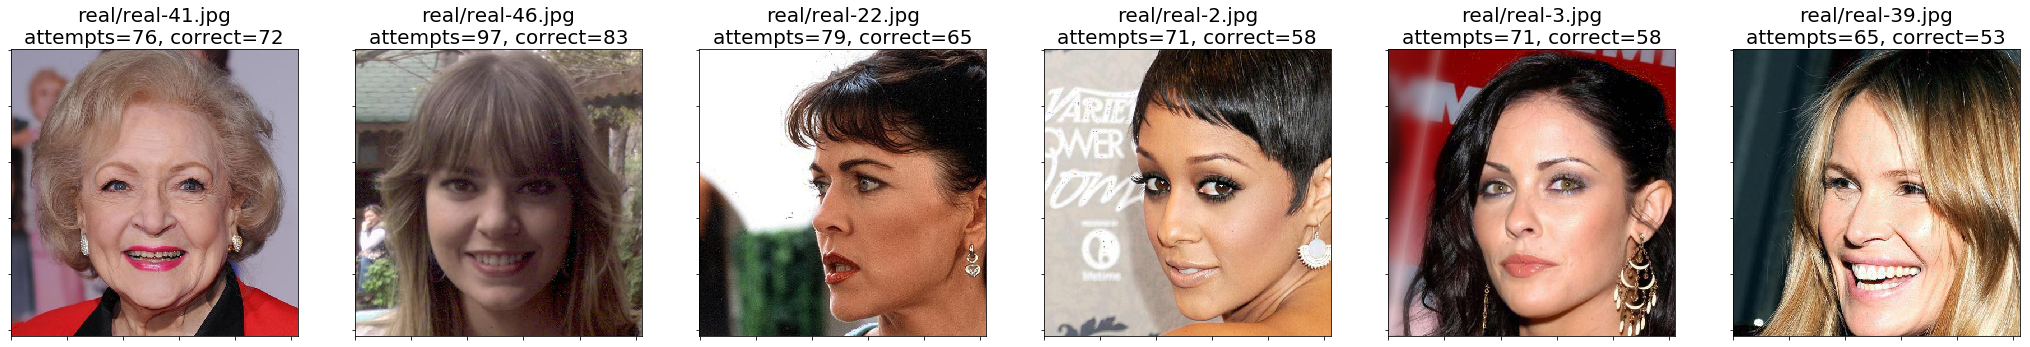

In [12]:
N = 6
expt_id = 1
true = 1
ascending = False

fs = 20

data = img_df[(img_df.true == true) & (img_df.expt_id == expt_id)].sort_values(by=['accuracy', 'id'], ascending=ascending).reset_index()

# plt.hist(data.accuracy, bins=10)
# plt.show()

fig = plt.figure(figsize=(36,6))
for i in range(N):
    ax = fig.add_subplot('%d%d%d' % (1,N,i+1))
    ax.set_title("%s\nattempts=%d, correct=%d" % (data.filename[i], data.id[i], int(data.correct[i])), fontsize=fs)
    filepath = os.path.join('./server/static', data.filename[i])
    ax.imshow(mpimg.imread(filepath))
    ax.set_yticklabels([])
    ax.set_xticklabels([])

# fig.savefig('./final_plots/easy_fake_exp1_expert.png')
plt.show()

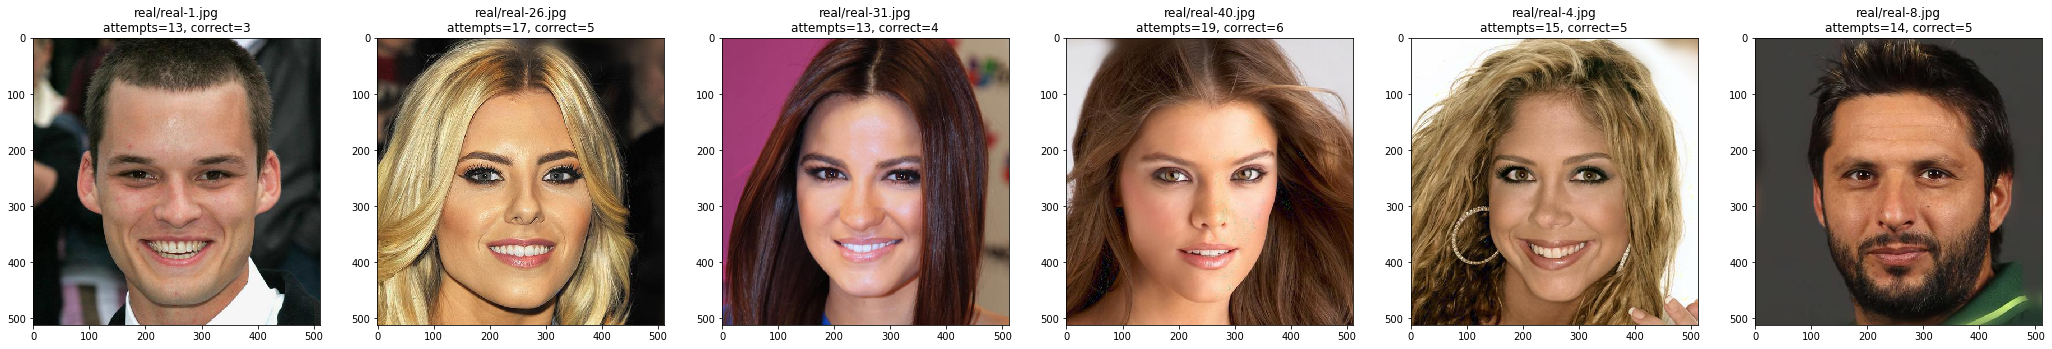

In [13]:
N = 6
true = 1
expt_id = 1
ascending = True
gender = 'female'

data = gender_img_df[(gender_img_df.true == true) & (gender_img_df.expt_id == expt_id) & (gender_img_df.gender == gender)].sort_values(by=['accuracy', 'id'], ascending=ascending).reset_index()

fig = plt.figure(figsize=(36,6))
for i in range(N):
    ax = fig.add_subplot('%d%d%d' % (1,N,i+1))
    ax.set_title("%s\nattempts=%d, correct=%d" % (data.filename[i], data.id[i], int(data.correct[i])))
    filepath = os.path.join('./server/static', data.filename[i])
    ax.imshow(mpimg.imread(filepath))

plt.show()